In [1]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

In [3]:
'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185




In [4]:
# 설명 변수 데이터를 정규화(비지도 학습, 예측변수 지정 필요X, 모두 설명변수로 활용)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('\n')

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]




In [5]:
'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)  # 클러스터 개수: 5개
cluster.KMeans()

# 모형 학습
kmeans.fit(X)   

# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

[1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 2 2 0 1 1 2 2 1 2 2 2 2 2 2 1 2
 1 1 2 2 2 1 1 1 1 1 3 1 1 2 2 1 1 2 2 3 1 2 2 1 3 1 1 2 3 2 1 2 2 2 0 2 1
 1 2 2 1 2 2 2 1 1 2 1 3 3 0 2 2 2 2 3 0 1 2 1 2 2 2 1 1 1 0 2 2 1 1 1 1 2
 1 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 2 1 2 2 2 2 2 0 2 0 2
 2 2 2 1 1 2 2 2 1 2 2 4 1 4 4 1 1 4 4 4 1 4 4 4 1 4 3 4 4 1 4 1 4 1 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 3 4 4 4 4 4 4 4
 4 4 4 4 4 1 4 1 4 1 4 4 4 4 2 2 2 2 2 2 1 2 1 2 2 0 2 2 2 2 2 2 2 2 1 4 1
 4 1 1 4 1 1 1 1 1 1 1 4 4 1 4 4 1 4 4 1 4 4 4 1 4 4 4 4 4 0 4 4 4 4 4 1 4
 3 4 1 4 4 4 4 1 1 2 1 2 2 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2
 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 1 1 2 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

- n_init : int, default=10
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia.

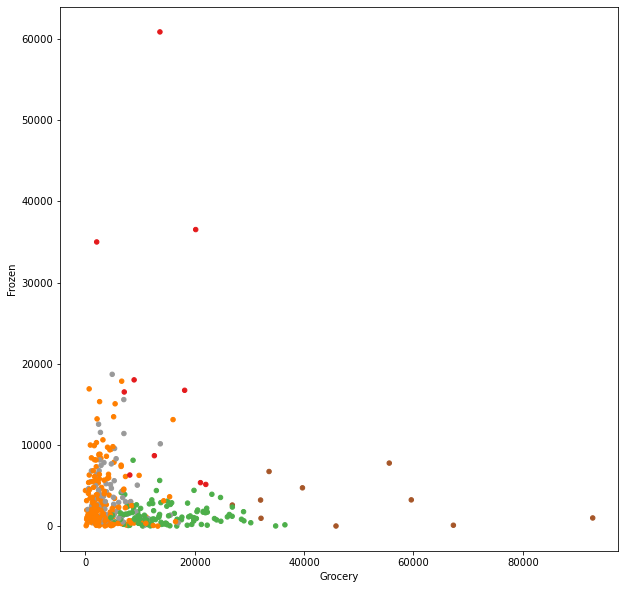

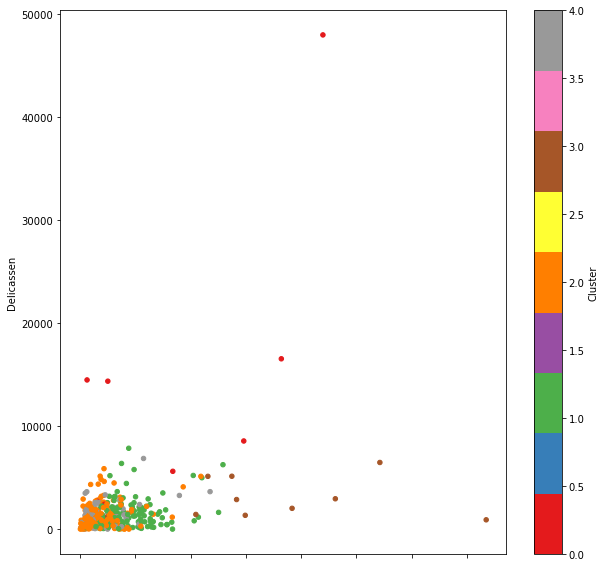

In [6]:
# 그래프로 표현 - 시각화 (8개 변수, 좌표면에 2개 선택 표현)
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

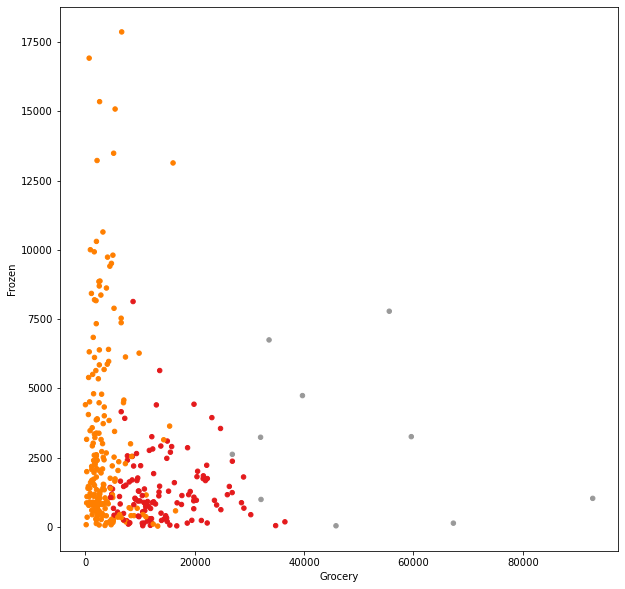

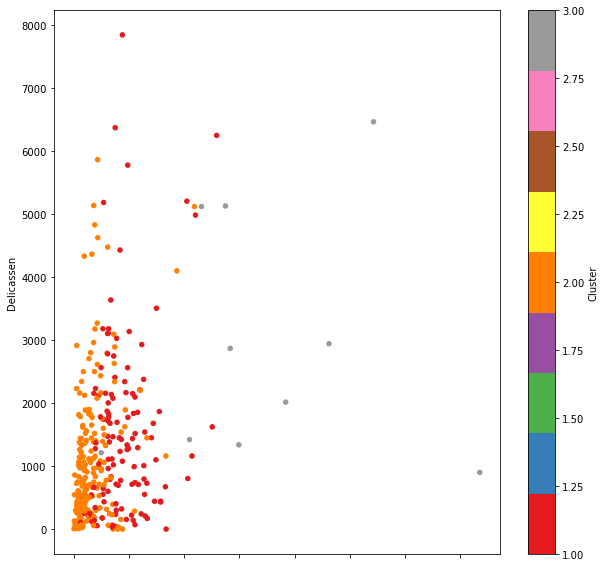

In [7]:
# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()